In [85]:
!pip install ucimlrepo

In [86]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [90]:
X['word_freq_make'] #freq of word make all freq are given in percentages

0       0.00
1       0.21
2       0.06
3       0.00
4       0.00
        ... 
4596    0.31
4597    0.00
4598    0.30
4599    0.96
4600    0.00
Name: word_freq_make, Length: 4601, dtype: float64

In [91]:
X.describe() # no anomalies in mean

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [92]:
# Should use dimensionality reduction, as no. of features are significantly larger than training instances
X['Label'] = y

In [93]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


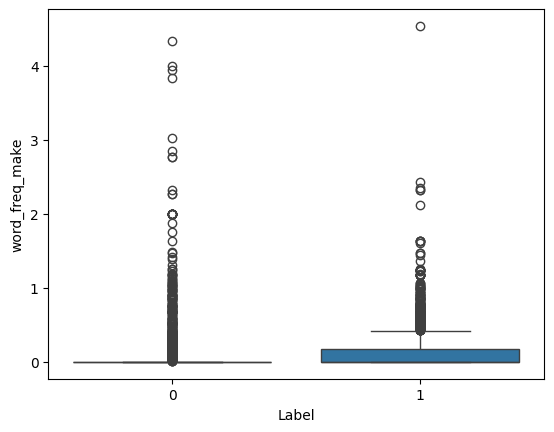

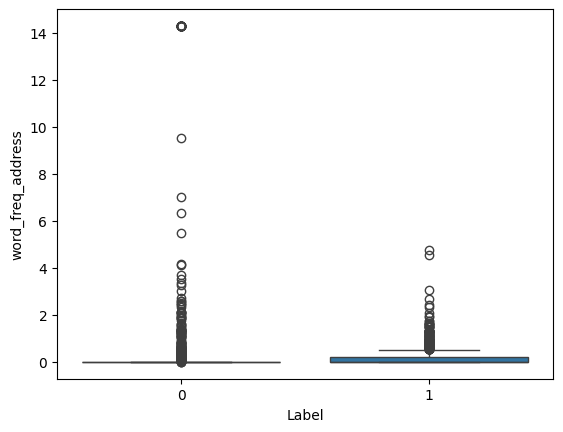

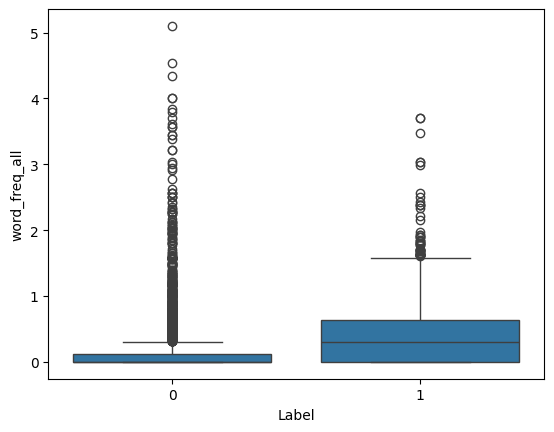

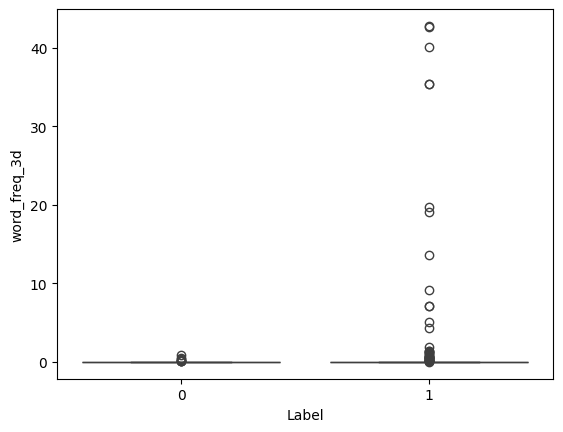

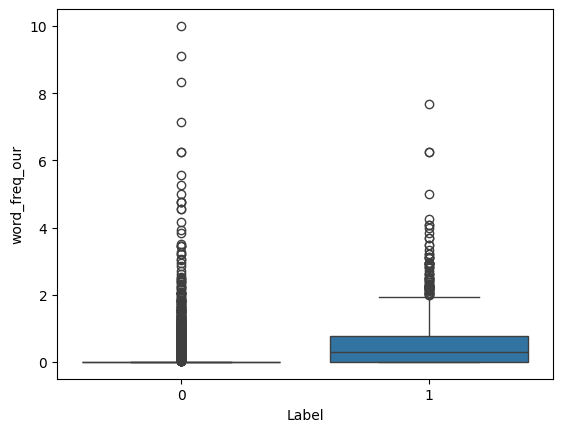

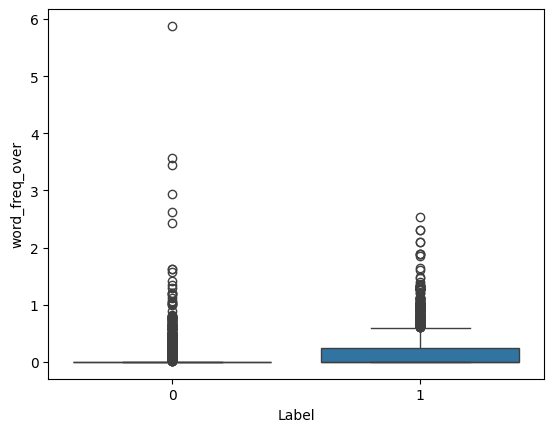

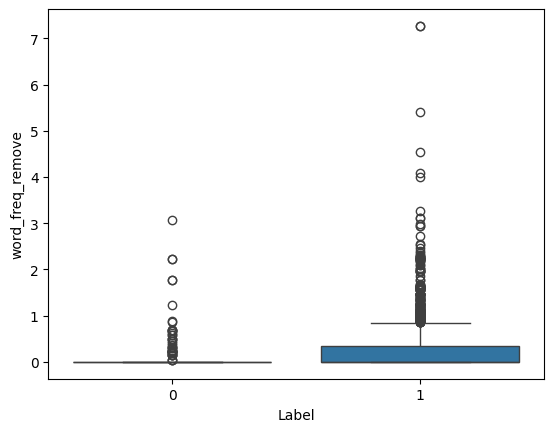

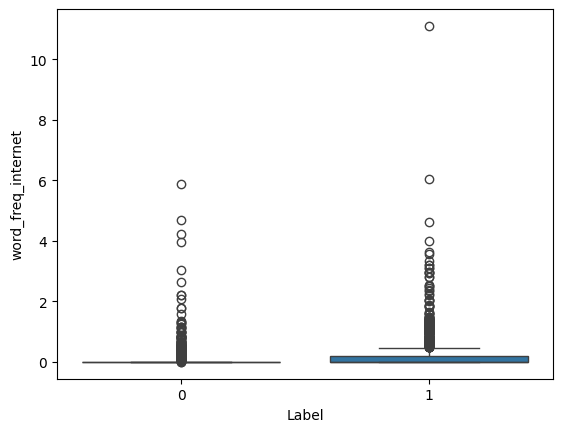

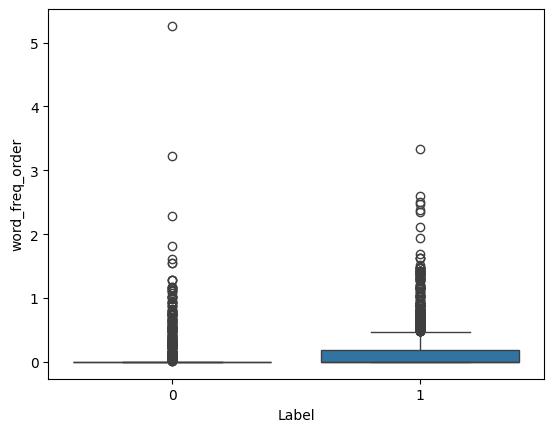

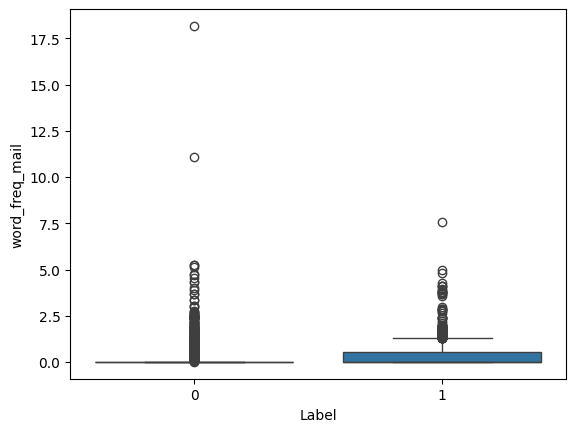

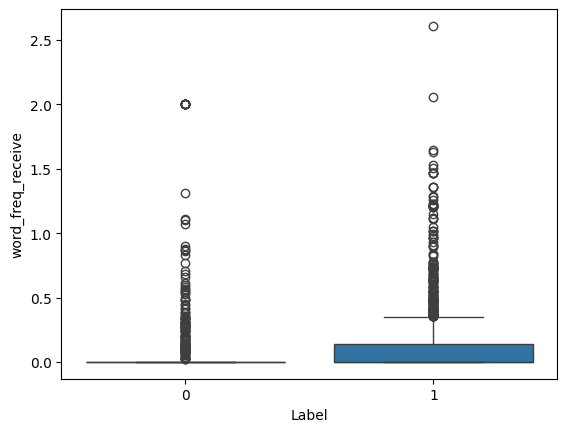

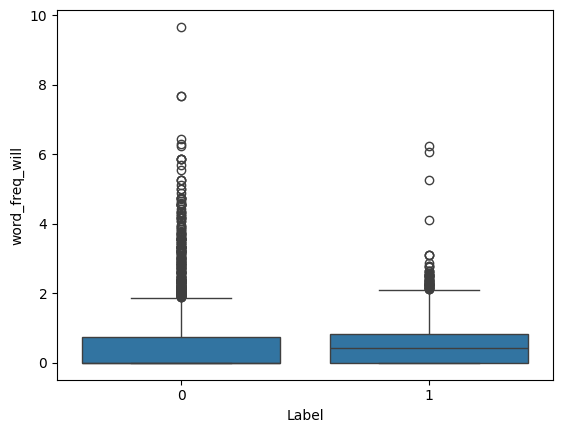

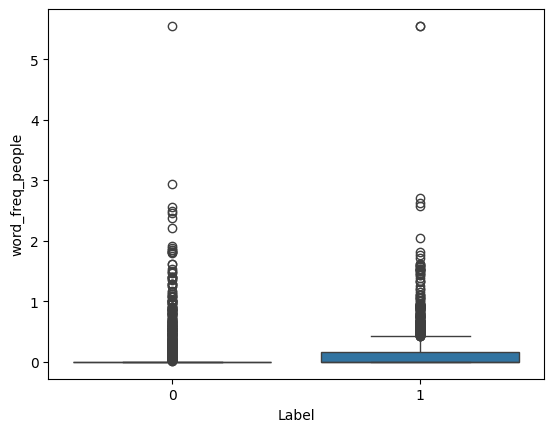

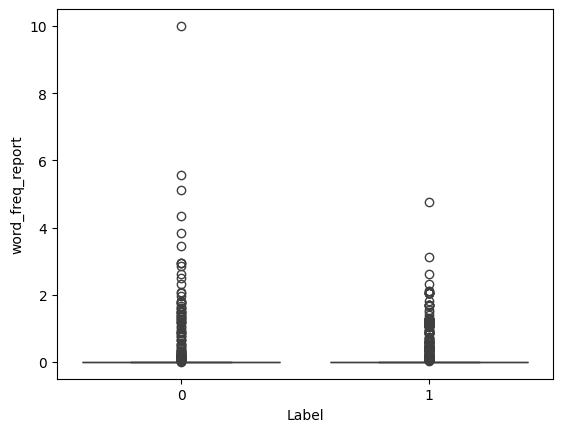

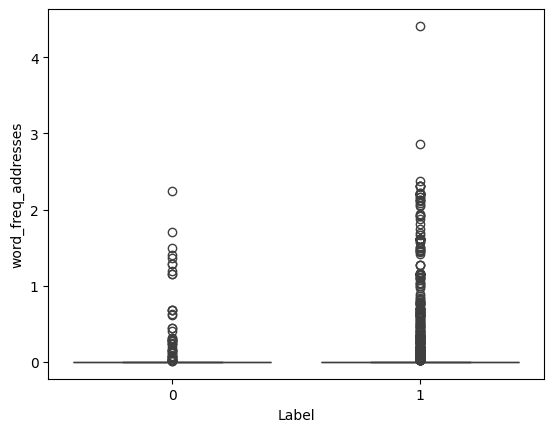

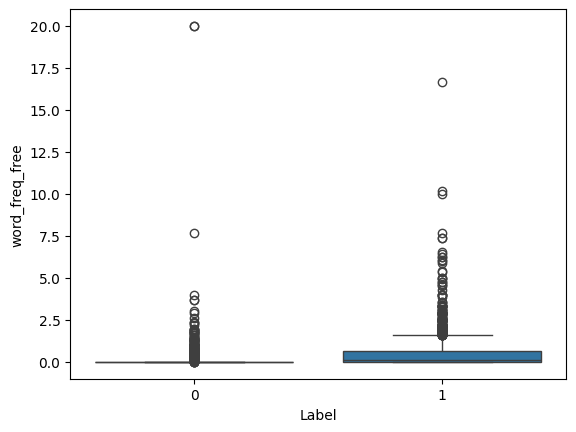

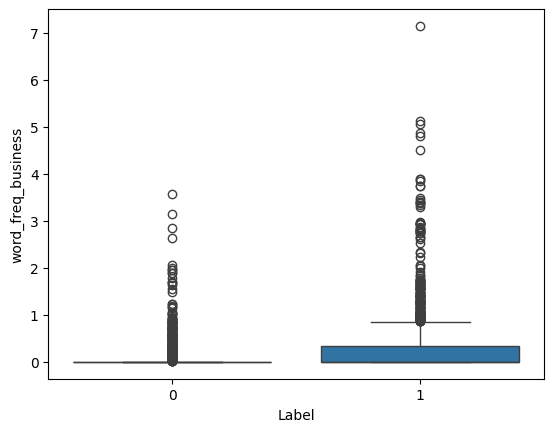

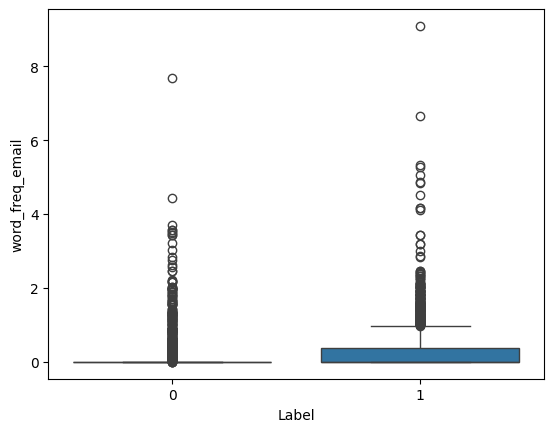

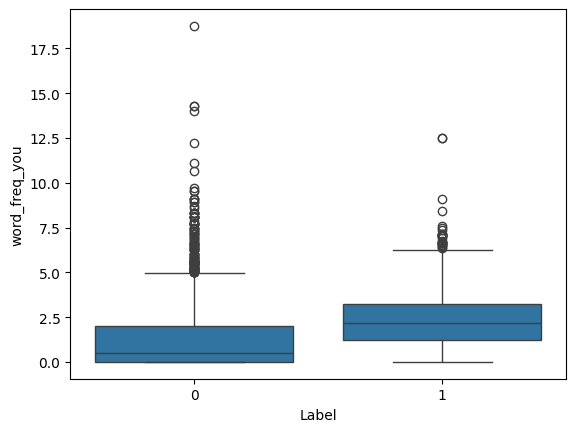

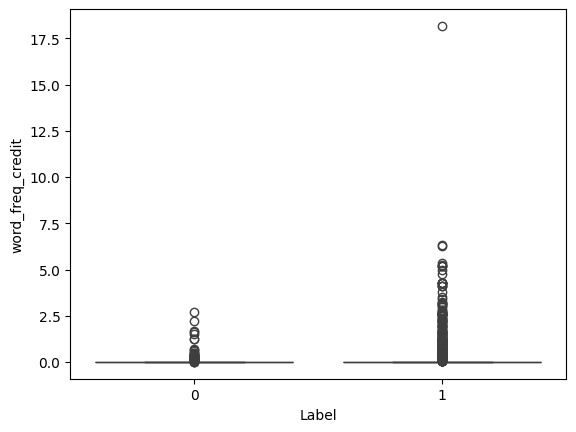

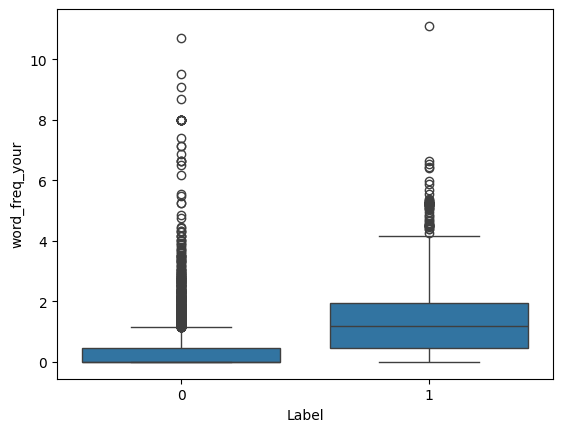

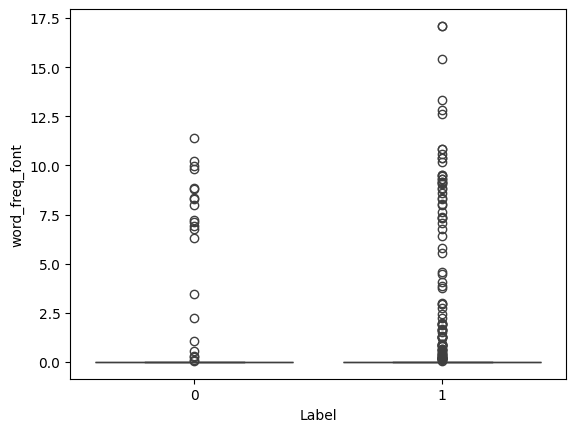

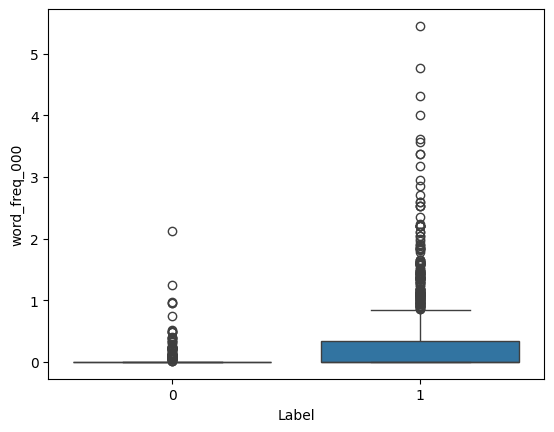

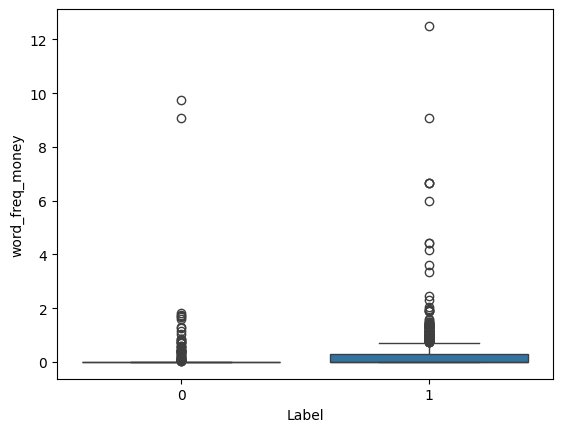

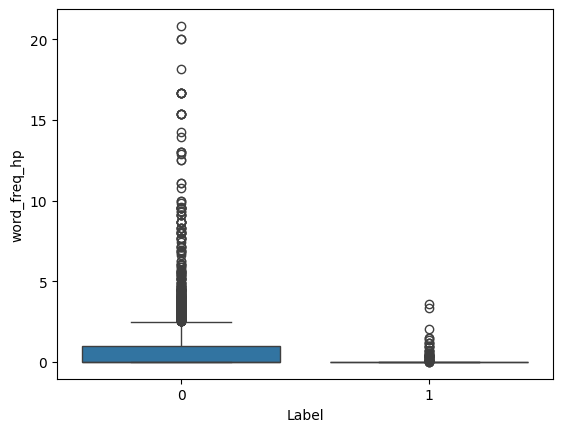

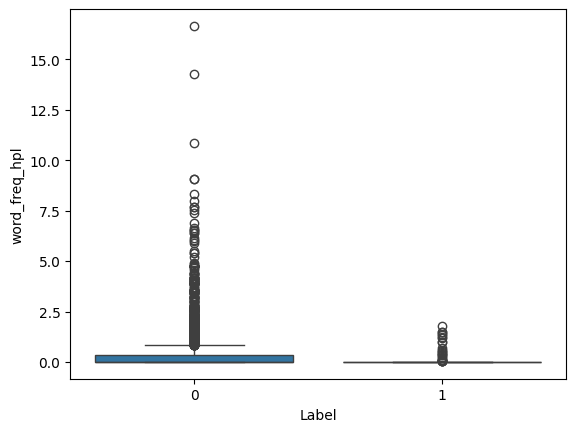

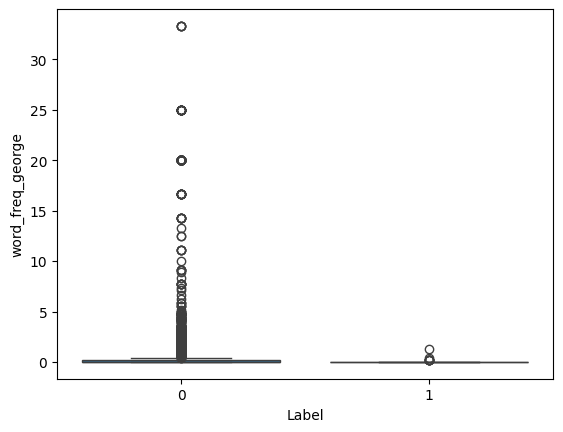

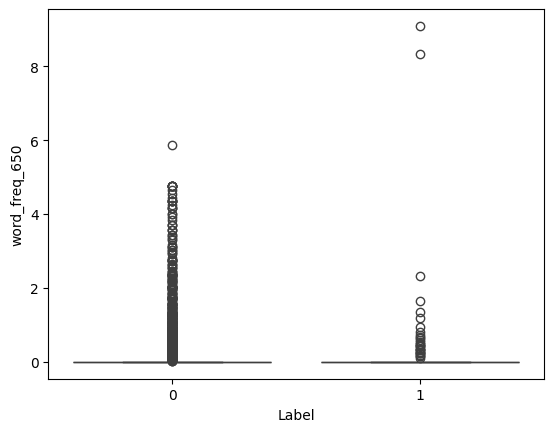

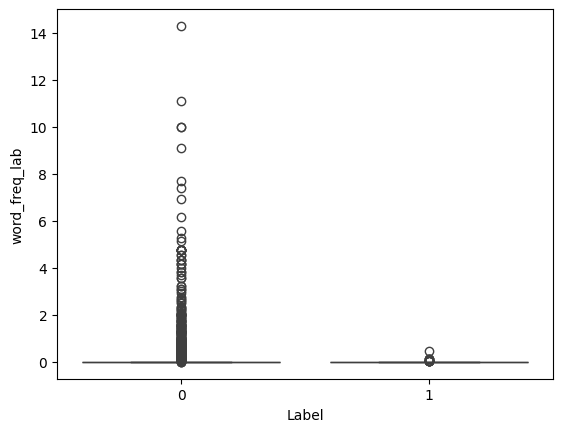

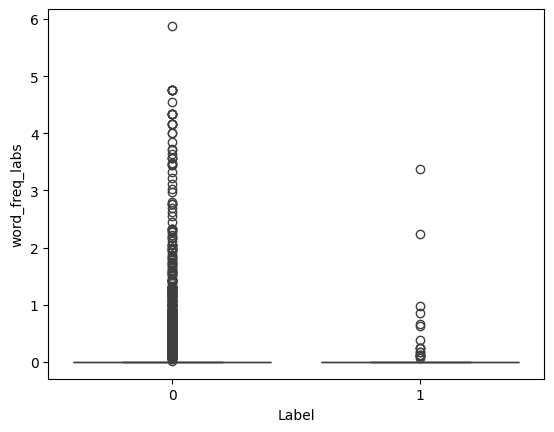

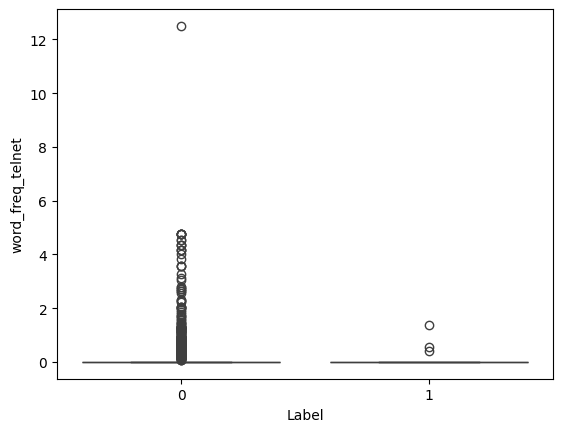

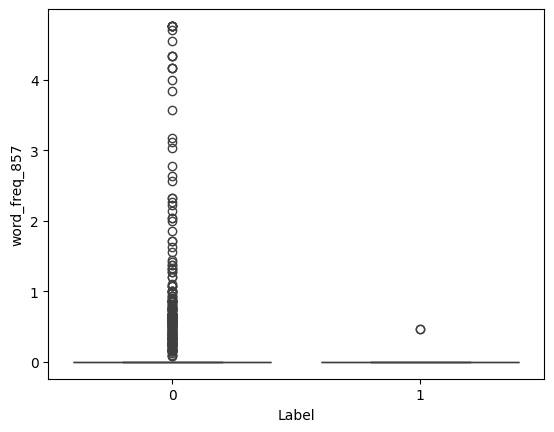

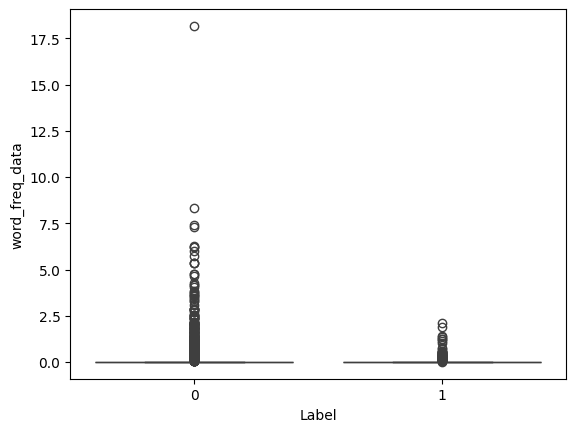

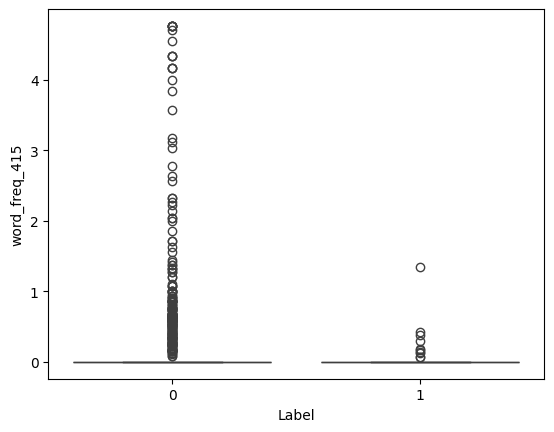

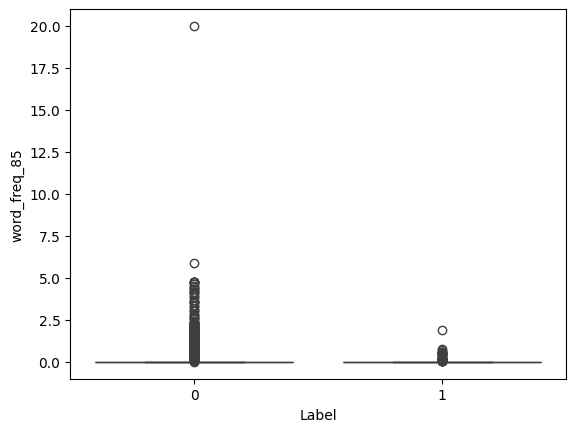

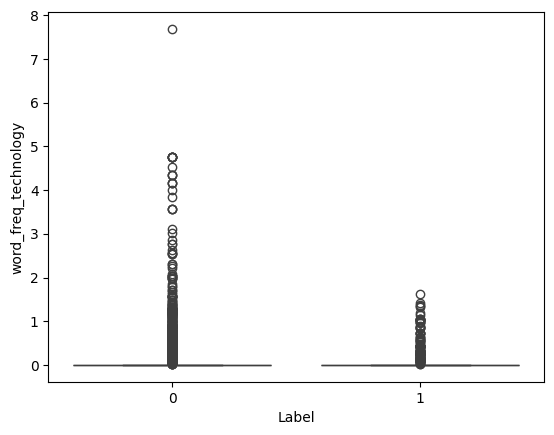

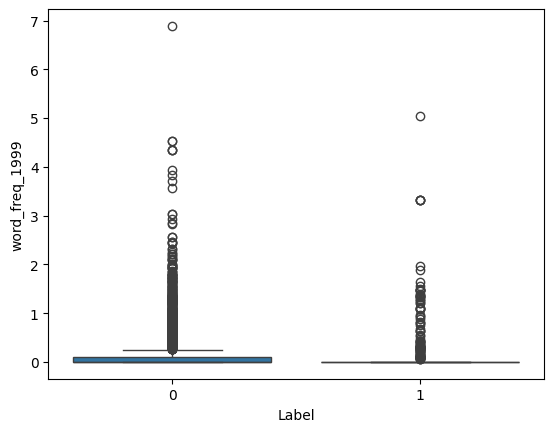

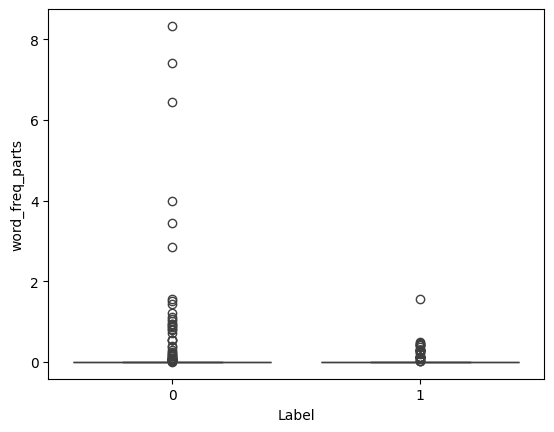

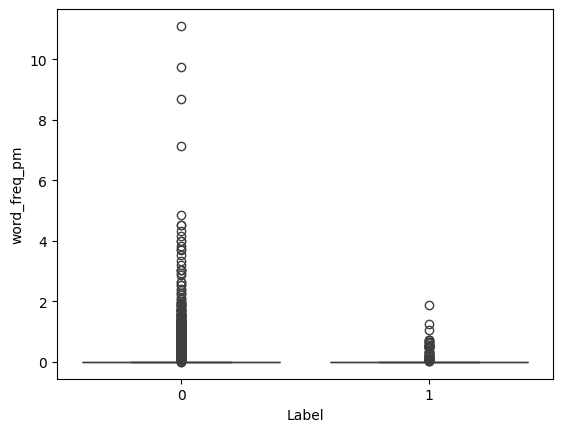

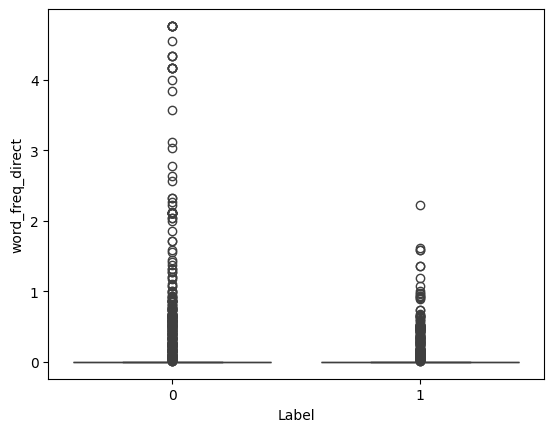

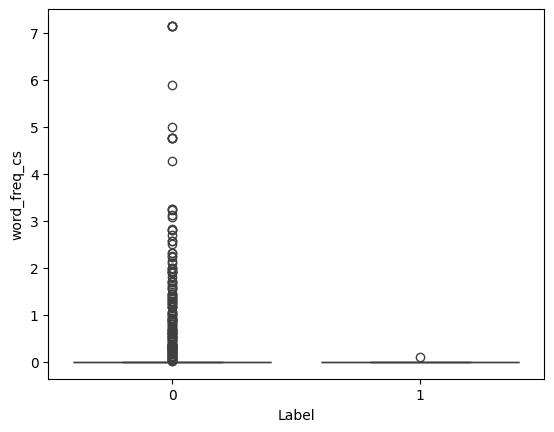

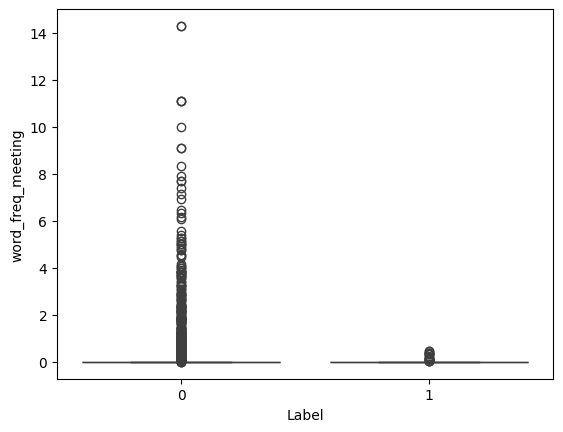

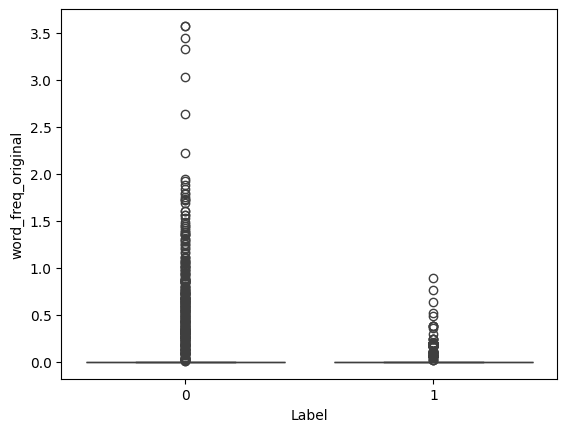

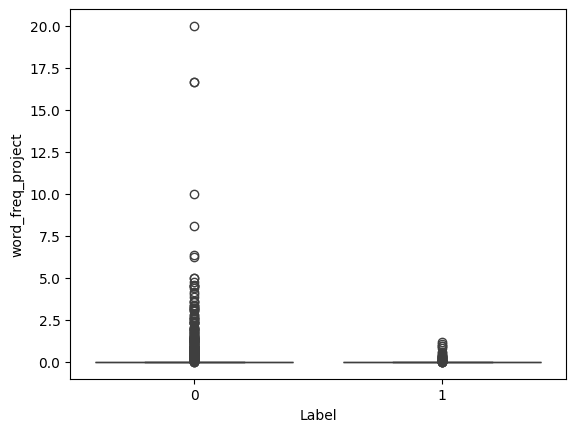

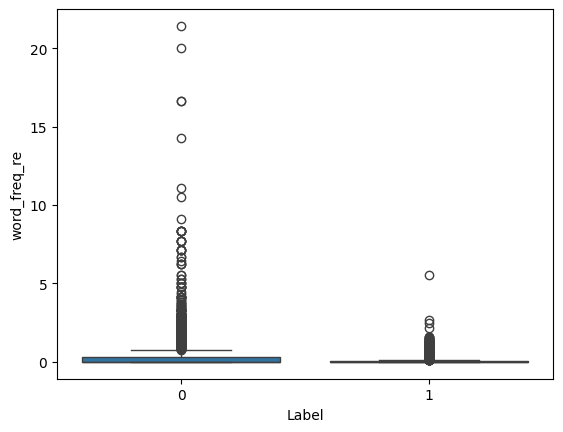

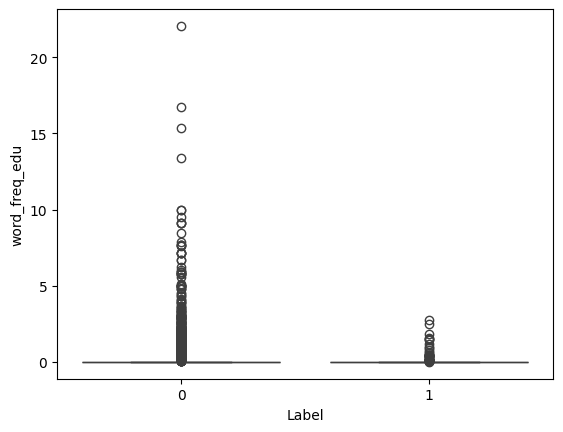

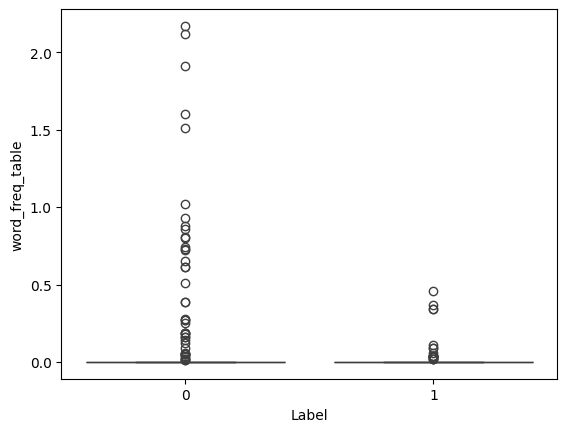

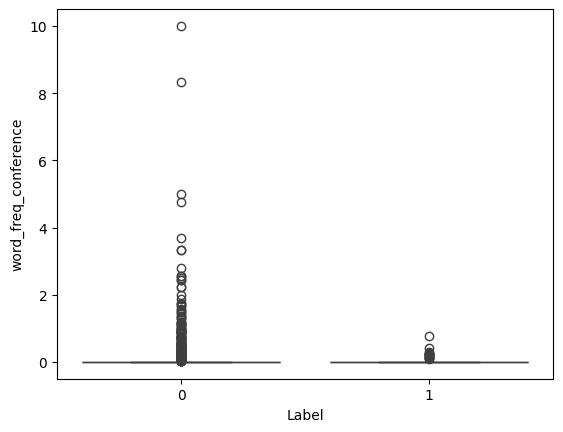

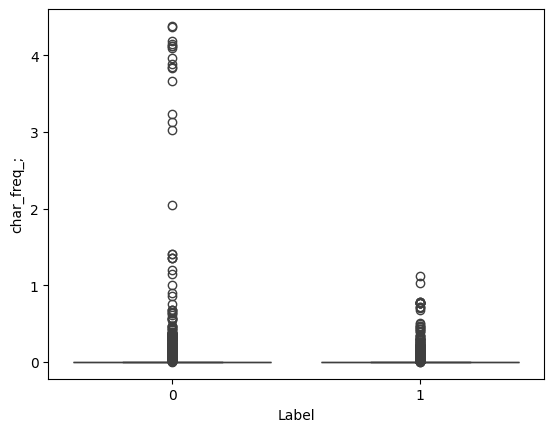

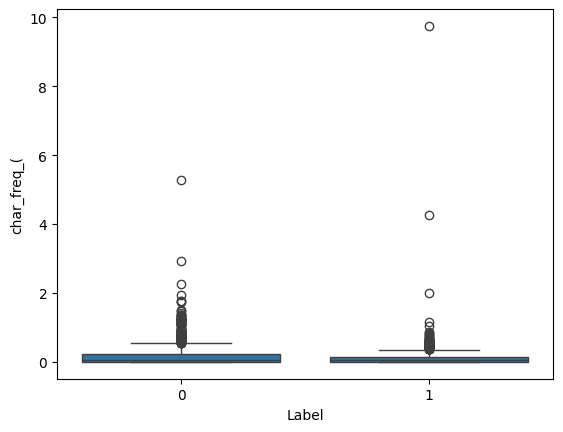

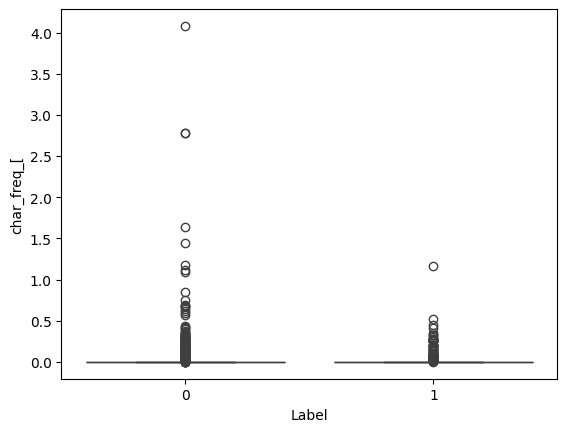

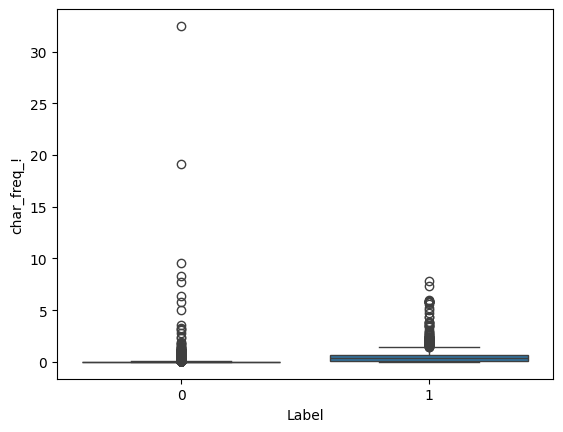

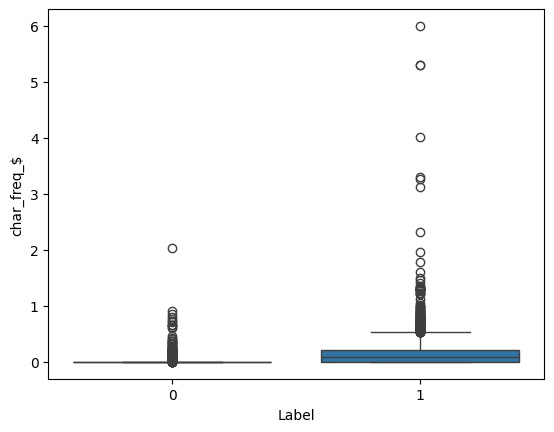

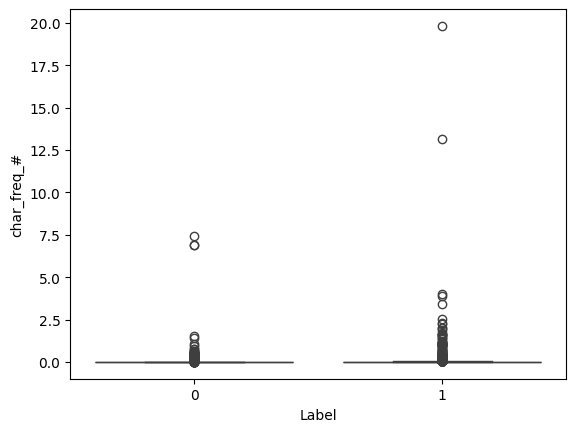

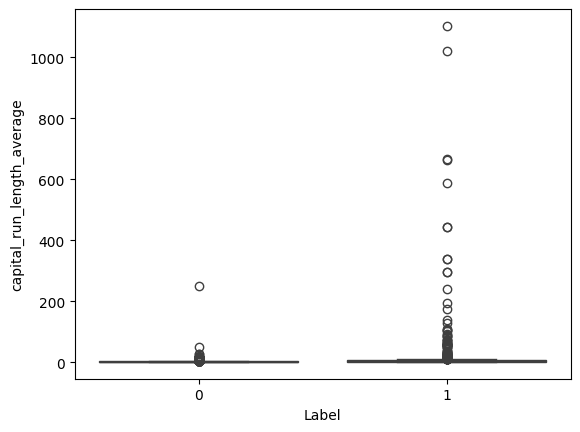

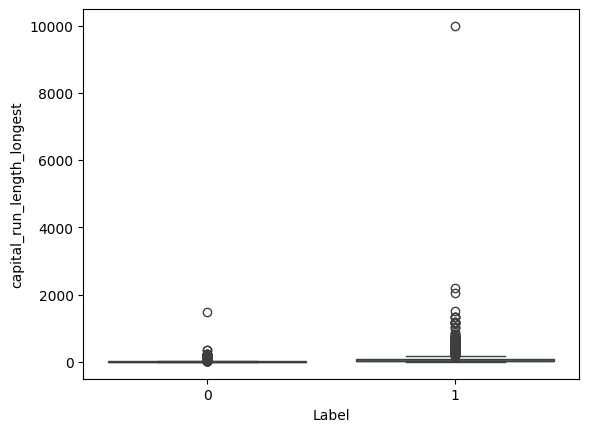

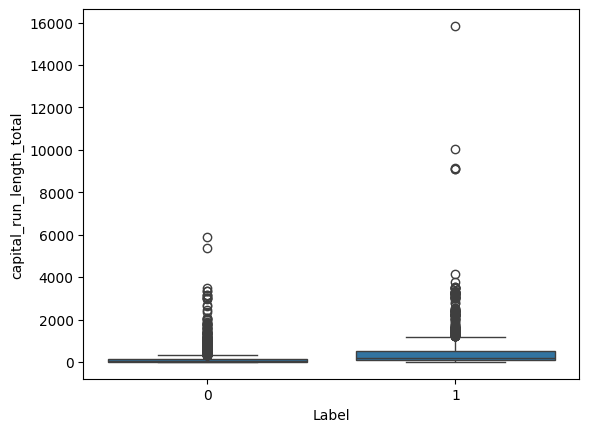

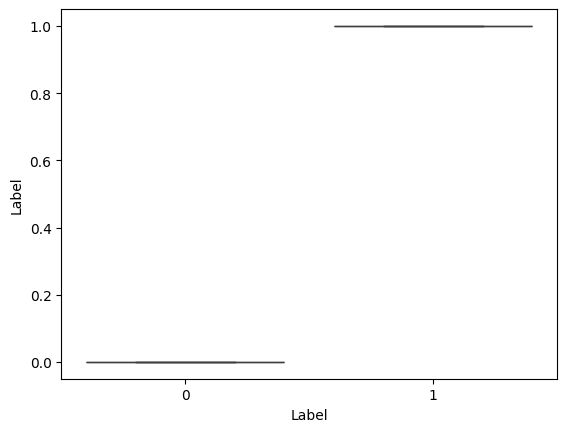

In [94]:
for i in X.columns:                    # As We can see lots of outliers but our model should be able to handle outliers so we are not removing them
  sns.boxplot(x='Label',y=i,data=X)
  plt.show()

In [95]:
corr_df = X.corr()

In [96]:
corr_df['Label']

word_freq_make                0.126208
word_freq_address            -0.030224
word_freq_all                 0.196988
word_freq_3d                  0.057371
word_freq_our                 0.241920
word_freq_over                0.232604
word_freq_remove              0.332117
word_freq_internet            0.206808
word_freq_order               0.231551
word_freq_mail                0.138962
word_freq_receive             0.234529
word_freq_will                0.007741
word_freq_people              0.132927
word_freq_report              0.060027
word_freq_addresses           0.195902
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_email               0.204208
word_freq_you                 0.273651
word_freq_credit              0.189761
word_freq_your                0.383234
word_freq_font                0.091860
word_freq_000                 0.334787
word_freq_money               0.216111
word_freq_hp                 -0.256723
word_freq_hpl            

In [97]:
X.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


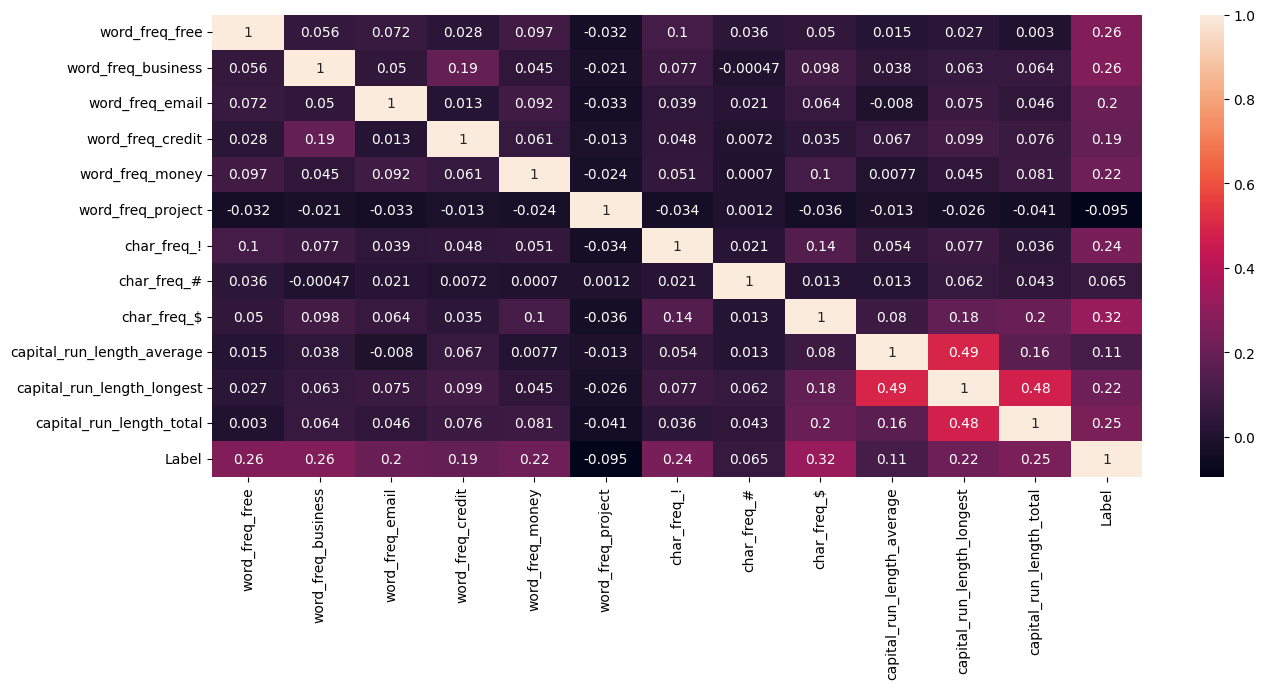

In [98]:
corr_df = X[['word_freq_free','word_freq_business','word_freq_email','word_freq_credit','word_freq_money','word_freq_project','char_freq_!','char_freq_#','char_freq_$','capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'Label']].corr()
plt.figure(figsize = (15,6))
sns.heatmap(corr_df,annot=True)
plt.show()

In [99]:
#Principal component analysis as the dimensions are quite high
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca_df = pd.DataFrame(pca.fit_transform(X),columns = [f'PC{i}' for i in range(1,11)])

In [100]:
y2 = X.sum(axis=1)

In [101]:
y2[y2==0] # no email contains none of the words mentioned

Series([], dtype: float64)

In [102]:
is_any_missing_data=X.isna().any().any()
is_any_missing_data

False

In [103]:
X.duplicated().sum()

391

In [104]:
y.value_counts() #data is imbalanced

Class
0        2788
1        1813
Name: count, dtype: int64

In [105]:
#undersampling the data
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(sampling_strategy = "not minority",random_state=42)
X_rus,y_rus = rus.fit_resample(pca_df,y)


In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus,random_state=42,test_size=0.3)

In [107]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
log_model.score(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8837667454688731

In [108]:
ypred = log_model.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix,classification_report

In [110]:
confusion_matrix(y_test,ypred)

array([[504,  67],
       [ 66, 451]])

In [111]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       571
           1       0.87      0.87      0.87       517

    accuracy                           0.88      1088
   macro avg       0.88      0.88      0.88      1088
weighted avg       0.88      0.88      0.88      1088



In [112]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(X_train,y_train)
rfm.score(X_train,y_train)

<ipython-input-112-d16ad466459d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfm.fit(X_train,y_train)


1.0

In [113]:
ypred = rfm.predict(X_test)

In [114]:
confusion_matrix(y_test,ypred)

array([[538,  33],
       [ 28, 489]])

In [115]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       571
           1       0.94      0.95      0.94       517

    accuracy                           0.94      1088
   macro avg       0.94      0.94      0.94      1088
weighted avg       0.94      0.94      0.94      1088



In [116]:
from sklearn.svm import SVC

svc_model = SVC(kernel = "linear")
svc_model.fit(X_train,y_train)
svc_model.score(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8967691095350669

In [117]:
ypred = svc_model.predict(X_test)

In [118]:
confusion_matrix(y_test,ypred)

array([[524,  47],
       [ 62, 455]])

In [119]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       571
           1       0.91      0.88      0.89       517

    accuracy                           0.90      1088
   macro avg       0.90      0.90      0.90      1088
weighted avg       0.90      0.90      0.90      1088

